In [31]:
import os
import sys

import nltk

# NER
from nltk.tag.stanford import StanfordNERTagger
jar = './stanford-ner.jar'
model = './ner-model-indonesia.ser.gz'

# Prepare NER tagger with english model
ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
import tensorflow as tf
sess = tf.Session()
from keras import backend as K

K.set_session(sess)
K.set_learning_phase(0)

import numpy as np
import random

from keras.applications import VGG19
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers
from keras.optimizers import adam

import matplotlib.pyplot as plt

In [33]:
from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model import utils
from tensorflow.python.saved_model import tag_constants, signature_constants
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def
from tensorflow.contrib.session_bundle import exporter

In [34]:
model_version = "2"

In [35]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [36]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['utterances']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['intent']))
        # add to our classes list
        if intent['intent'] not in classes:
            classes.append(intent['intent'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

55 documents
16 classes ['appointment', 'appointmentForSomeone', 'appointmentWithDate', 'appointmentWithDoctor', 'cancelAppointment', 'concern', 'doctor', 'goodbye', 'greeting', 'insurance', 'medsTaken', 'noMedsTaken', 'numbOfDays', 'openingHours', 'pain', 'paymentMethod']
78 unique stemmed words ['', 'allianz', 'anak', 'apa', 'apakah', 'asuransi', 'axa', 'bambang', 'bapak', 'batal', 'bayar', 'belum', 'berapa', 'besok', 'bisa', 'bpjs', 'buat', 'buka', 'bye', 'dan', 'debit', 'dengan', 'di', 'dokter', 'dr', 'goodbye', 'halo', 'hari', 'hello', 'hi', 'ibu', 'ingin', 'ini', 'insurance', 'istri', 'jam', 'janji', 'kabar', 'kartu', 'keluh', 'kemarin', 'kepala', 'kredit', 'layan', 'lemas', 'lippo', 'malam', 'mastercard', 'meriang', 'minum', 'nanti', 'obat', 'pagi', 'pakai', 'payment', 'periksa', 'perut', 'pinggang', 'pusing', 'rasa', 'sakit', 'saya', 'sejak', 'selamat', 'siang', 'siapa', 'simasnet', 'smarthealth', 'sore', 'suami', 'sudah', 'tadi', 'terima', 'tinggal', 'tugas', 'untuk', 'visa', 

In [37]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [38]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 632       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                144       
Total params: 920
Trainable params: 920
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
55/55 [==============================] - 0s 5ms/step - loss: 2.8306 - acc: 0.0727
Epoch 2/1000
55/55 [==============================] - 0s 337us/step - loss: 2.7890 - acc: 0.1091
Epoch 3/1000
55/55 [==============================] - 0s 267us/step - loss: 2.7472 -

Epoch 76/1000
55/55 [==============================] - 0s 263us/step - loss: 0.5178 - acc: 0.8909
Epoch 77/1000
55/55 [==============================] - 0s 294us/step - loss: 0.5066 - acc: 0.8909
Epoch 78/1000
55/55 [==============================] - 0s 280us/step - loss: 0.4932 - acc: 0.8909
Epoch 79/1000
55/55 [==============================] - 0s 363us/step - loss: 0.4825 - acc: 0.8909
Epoch 80/1000
55/55 [==============================] - 0s 279us/step - loss: 0.4705 - acc: 0.8909
Epoch 81/1000
55/55 [==============================] - 0s 339us/step - loss: 0.4602 - acc: 0.8909
Epoch 82/1000
55/55 [==============================] - 0s 289us/step - loss: 0.4489 - acc: 0.9091
Epoch 83/1000
55/55 [==============================] - 0s 283us/step - loss: 0.4387 - acc: 0.9091
Epoch 84/1000
55/55 [==============================] - 0s 280us/step - loss: 0.4272 - acc: 0.9091
Epoch 85/1000
55/55 [==============================] - 0s 279us/step - loss: 0.4168 - acc: 0.9091
Epoch 86/1000
55/55 

Epoch 159/1000
55/55 [==============================] - 0s 296us/step - loss: 0.0687 - acc: 1.0000
Epoch 160/1000
55/55 [==============================] - 0s 298us/step - loss: 0.0671 - acc: 1.0000
Epoch 161/1000
55/55 [==============================] - 0s 321us/step - loss: 0.0655 - acc: 1.0000
Epoch 162/1000
55/55 [==============================] - 0s 353us/step - loss: 0.0649 - acc: 1.0000
Epoch 163/1000
55/55 [==============================] - 0s 301us/step - loss: 0.0624 - acc: 1.0000
Epoch 164/1000
55/55 [==============================] - 0s 289us/step - loss: 0.0611 - acc: 1.0000
Epoch 165/1000
55/55 [==============================] - 0s 276us/step - loss: 0.0598 - acc: 1.0000
Epoch 166/1000
55/55 [==============================] - 0s 318us/step - loss: 0.0582 - acc: 1.0000
Epoch 167/1000
55/55 [==============================] - 0s 324us/step - loss: 0.0570 - acc: 1.0000
Epoch 168/1000
55/55 [==============================] - 0s 258us/step - loss: 0.0561 - acc: 1.0000
Epoch 169/

55/55 [==============================] - 0s 278us/step - loss: 0.0131 - acc: 1.0000
Epoch 242/1000
55/55 [==============================] - 0s 337us/step - loss: 0.0129 - acc: 1.0000
Epoch 243/1000
55/55 [==============================] - 0s 305us/step - loss: 0.0128 - acc: 1.0000
Epoch 244/1000
55/55 [==============================] - 0s 359us/step - loss: 0.0125 - acc: 1.0000
Epoch 245/1000
55/55 [==============================] - 0s 438us/step - loss: 0.0123 - acc: 1.0000
Epoch 246/1000
55/55 [==============================] - 0s 328us/step - loss: 0.0121 - acc: 1.0000
Epoch 247/1000
55/55 [==============================] - 0s 260us/step - loss: 0.0119 - acc: 1.0000
Epoch 248/1000
55/55 [==============================] - 0s 335us/step - loss: 0.0117 - acc: 1.0000
Epoch 249/1000
55/55 [==============================] - 0s 393us/step - loss: 0.0116 - acc: 1.0000
Epoch 250/1000
55/55 [==============================] - 0s 533us/step - loss: 0.0114 - acc: 1.0000
Epoch 251/1000
55/55 [===

55/55 [==============================] - 0s 242us/step - loss: 0.0045 - acc: 1.0000
Epoch 324/1000
55/55 [==============================] - 0s 311us/step - loss: 0.0044 - acc: 1.0000
Epoch 325/1000
55/55 [==============================] - 0s 294us/step - loss: 0.0044 - acc: 1.0000
Epoch 326/1000
55/55 [==============================] - 0s 330us/step - loss: 0.0043 - acc: 1.0000
Epoch 327/1000
55/55 [==============================] - 0s 309us/step - loss: 0.0043 - acc: 1.0000
Epoch 328/1000
55/55 [==============================] - 0s 292us/step - loss: 0.0043 - acc: 1.0000
Epoch 329/1000
55/55 [==============================] - 0s 311us/step - loss: 0.0042 - acc: 1.0000
Epoch 330/1000
55/55 [==============================] - 0s 332us/step - loss: 0.0042 - acc: 1.0000
Epoch 331/1000
55/55 [==============================] - 0s 327us/step - loss: 0.0041 - acc: 1.0000
Epoch 332/1000
55/55 [==============================] - 0s 339us/step - loss: 0.0041 - acc: 1.0000
Epoch 333/1000
55/55 [===

55/55 [==============================] - 0s 235us/step - loss: 0.0021 - acc: 1.0000
Epoch 406/1000
55/55 [==============================] - 0s 288us/step - loss: 0.0021 - acc: 1.0000
Epoch 407/1000
55/55 [==============================] - 0s 281us/step - loss: 0.0021 - acc: 1.0000
Epoch 408/1000
55/55 [==============================] - 0s 330us/step - loss: 0.0020 - acc: 1.0000
Epoch 409/1000
55/55 [==============================] - 0s 289us/step - loss: 0.0020 - acc: 1.0000
Epoch 410/1000
55/55 [==============================] - 0s 360us/step - loss: 0.0020 - acc: 1.0000
Epoch 411/1000
55/55 [==============================] - 0s 342us/step - loss: 0.0020 - acc: 1.0000
Epoch 412/1000
55/55 [==============================] - 0s 454us/step - loss: 0.0020 - acc: 1.0000
Epoch 413/1000
55/55 [==============================] - 0s 554us/step - loss: 0.0020 - acc: 1.0000
Epoch 414/1000
55/55 [==============================] - 0s 412us/step - loss: 0.0020 - acc: 1.0000
Epoch 415/1000
55/55 [===

55/55 [==============================] - 0s 314us/step - loss: 0.0011 - acc: 1.0000
Epoch 488/1000
55/55 [==============================] - 0s 252us/step - loss: 0.0011 - acc: 1.0000
Epoch 489/1000
55/55 [==============================] - 0s 305us/step - loss: 0.0011 - acc: 1.0000
Epoch 490/1000
55/55 [==============================] - 0s 246us/step - loss: 0.0011 - acc: 1.0000
Epoch 491/1000
55/55 [==============================] - 0s 381us/step - loss: 0.0011 - acc: 1.0000
Epoch 492/1000
55/55 [==============================] - 0s 285us/step - loss: 0.0011 - acc: 1.0000
Epoch 493/1000
55/55 [==============================] - 0s 283us/step - loss: 0.0011 - acc: 1.0000
Epoch 494/1000
55/55 [==============================] - 0s 289us/step - loss: 0.0011 - acc: 1.0000
Epoch 495/1000
55/55 [==============================] - 0s 283us/step - loss: 0.0011 - acc: 1.0000
Epoch 496/1000
55/55 [==============================] - 0s 315us/step - loss: 0.0011 - acc: 1.0000
Epoch 497/1000
55/55 [===

55/55 [==============================] - 0s 350us/step - loss: 6.8995e-04 - acc: 1.0000
Epoch 568/1000
55/55 [==============================] - 0s 239us/step - loss: 6.8545e-04 - acc: 1.0000
Epoch 569/1000
55/55 [==============================] - 0s 293us/step - loss: 6.8140e-04 - acc: 1.0000
Epoch 570/1000
55/55 [==============================] - 0s 262us/step - loss: 6.7692e-04 - acc: 1.0000
Epoch 571/1000
55/55 [==============================] - 0s 338us/step - loss: 6.7287e-04 - acc: 1.0000
Epoch 572/1000
55/55 [==============================] - 0s 272us/step - loss: 6.6840e-04 - acc: 1.0000
Epoch 573/1000
55/55 [==============================] - 0s 320us/step - loss: 6.6485e-04 - acc: 1.0000
Epoch 574/1000
55/55 [==============================] - 0s 323us/step - loss: 6.6091e-04 - acc: 1.0000
Epoch 575/1000
55/55 [==============================] - 0s 285us/step - loss: 6.5794e-04 - acc: 1.0000
Epoch 576/1000
55/55 [==============================] - 0s 589us/step - loss: 6.5321e-04

55/55 [==============================] - 0s 289us/step - loss: 4.3897e-04 - acc: 1.0000
Epoch 647/1000
55/55 [==============================] - 0s 244us/step - loss: 4.3645e-04 - acc: 1.0000
Epoch 648/1000
55/55 [==============================] - 0s 249us/step - loss: 4.3363e-04 - acc: 1.0000
Epoch 649/1000
55/55 [==============================] - 0s 323us/step - loss: 4.3165e-04 - acc: 1.0000
Epoch 650/1000
55/55 [==============================] - 0s 291us/step - loss: 4.2901e-04 - acc: 1.0000
Epoch 651/1000
55/55 [==============================] - 0s 291us/step - loss: 4.2689e-04 - acc: 1.0000
Epoch 652/1000
55/55 [==============================] - 0s 298us/step - loss: 4.2440e-04 - acc: 1.0000
Epoch 653/1000
55/55 [==============================] - 0s 312us/step - loss: 4.2218e-04 - acc: 1.0000
Epoch 654/1000
55/55 [==============================] - 0s 319us/step - loss: 4.1983e-04 - acc: 1.0000
Epoch 655/1000
55/55 [==============================] - 0s 283us/step - loss: 4.1782e-04

55/55 [==============================] - 0s 348us/step - loss: 2.8884e-04 - acc: 1.0000
Epoch 726/1000
55/55 [==============================] - 0s 271us/step - loss: 2.8729e-04 - acc: 1.0000
Epoch 727/1000
55/55 [==============================] - 0s 314us/step - loss: 2.8598e-04 - acc: 1.0000
Epoch 728/1000
55/55 [==============================] - 0s 234us/step - loss: 2.8442e-04 - acc: 1.0000
Epoch 729/1000
55/55 [==============================] - 0s 340us/step - loss: 2.8288e-04 - acc: 1.0000
Epoch 730/1000
55/55 [==============================] - 0s 330us/step - loss: 2.8168e-04 - acc: 1.0000
Epoch 731/1000
55/55 [==============================] - 0s 309us/step - loss: 2.8012e-04 - acc: 1.0000
Epoch 732/1000
55/55 [==============================] - 0s 345us/step - loss: 2.7887e-04 - acc: 1.0000
Epoch 733/1000
55/55 [==============================] - 0s 324us/step - loss: 2.7705e-04 - acc: 1.0000
Epoch 734/1000
55/55 [==============================] - 0s 310us/step - loss: 2.7591e-04

55/55 [==============================] - 0s 263us/step - loss: 1.9474e-04 - acc: 1.0000
Epoch 805/1000
55/55 [==============================] - 0s 272us/step - loss: 1.9382e-04 - acc: 1.0000
Epoch 806/1000
55/55 [==============================] - 0s 299us/step - loss: 1.9304e-04 - acc: 1.0000
Epoch 807/1000
55/55 [==============================] - 0s 246us/step - loss: 1.9182e-04 - acc: 1.0000
Epoch 808/1000
55/55 [==============================] - 0s 228us/step - loss: 1.9092e-04 - acc: 1.0000
Epoch 809/1000
55/55 [==============================] - 0s 284us/step - loss: 1.9009e-04 - acc: 1.0000
Epoch 810/1000
55/55 [==============================] - 0s 329us/step - loss: 1.8913e-04 - acc: 1.0000
Epoch 811/1000
55/55 [==============================] - 0s 340us/step - loss: 1.8836e-04 - acc: 1.0000
Epoch 812/1000
55/55 [==============================] - 0s 350us/step - loss: 1.8728e-04 - acc: 1.0000
Epoch 813/1000
55/55 [==============================] - 0s 284us/step - loss: 1.8646e-04

55/55 [==============================] - 0s 347us/step - loss: 1.3359e-04 - acc: 1.0000
Epoch 884/1000
55/55 [==============================] - 0s 225us/step - loss: 1.3289e-04 - acc: 1.0000
Epoch 885/1000
55/55 [==============================] - 0s 263us/step - loss: 1.3228e-04 - acc: 1.0000
Epoch 886/1000
55/55 [==============================] - 0s 283us/step - loss: 1.3163e-04 - acc: 1.0000
Epoch 887/1000
55/55 [==============================] - 0s 391us/step - loss: 1.3111e-04 - acc: 1.0000
Epoch 888/1000
55/55 [==============================] - 0s 319us/step - loss: 1.3047e-04 - acc: 1.0000
Epoch 889/1000
55/55 [==============================] - 0s 369us/step - loss: 1.2989e-04 - acc: 1.0000
Epoch 890/1000
55/55 [==============================] - 0s 328us/step - loss: 1.2932e-04 - acc: 1.0000
Epoch 891/1000
55/55 [==============================] - 0s 360us/step - loss: 1.2868e-04 - acc: 1.0000
Epoch 892/1000
55/55 [==============================] - 0s 345us/step - loss: 1.2807e-04

55/55 [==============================] - 0s 216us/step - loss: 9.2745e-05 - acc: 1.0000
Epoch 963/1000
55/55 [==============================] - 0s 826us/step - loss: 9.2355e-05 - acc: 1.0000
Epoch 964/1000
55/55 [==============================] - 0s 380us/step - loss: 9.1920e-05 - acc: 1.0000
Epoch 965/1000
55/55 [==============================] - 0s 265us/step - loss: 9.1477e-05 - acc: 1.0000
Epoch 966/1000
55/55 [==============================] - 0s 346us/step - loss: 9.1183e-05 - acc: 1.0000
Epoch 967/1000
55/55 [==============================] - 0s 386us/step - loss: 9.0743e-05 - acc: 1.0000
Epoch 968/1000
55/55 [==============================] - 0s 362us/step - loss: 9.0238e-05 - acc: 1.0000
Epoch 969/1000
55/55 [==============================] - 0s 325us/step - loss: 8.9809e-05 - acc: 1.0000
Epoch 970/1000
55/55 [==============================] - 0s 316us/step - loss: 8.9597e-05 - acc: 1.0000
Epoch 971/1000
55/55 [==============================] - 0s 347us/step - loss: 8.9051e-05

In [39]:
'''export_path = 'folder_to_export/1'
builder = saved_model_builder.SavedModelBuilder(export_path)

signature = predict_signature_def(inputs={'images': model.input},
                                  outputs={'scores': model.output})

builder.add_meta_graph_and_variables(sess=sess,
                                        tags=[tag_constants.SERVING],
                                         signature_def_map={'predict': signature})
builder.save()'''

"export_path = 'folder_to_export/1'\nbuilder = saved_model_builder.SavedModelBuilder(export_path)\n\nsignature = predict_signature_def(inputs={'images': model.input},\n                                  outputs={'scores': model.output})\n\nbuilder.add_meta_graph_and_variables(sess=sess,\n                                        tags=[tag_constants.SERVING],\n                                         signature_def_map={'predict': signature})\nbuilder.save()"

/usr/local/lib/python3.6/site-packages/keras/engine/saving.py:118: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


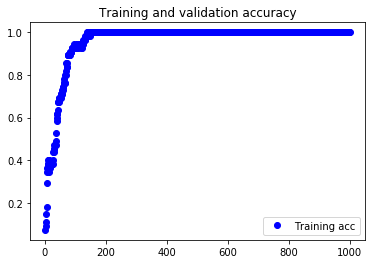

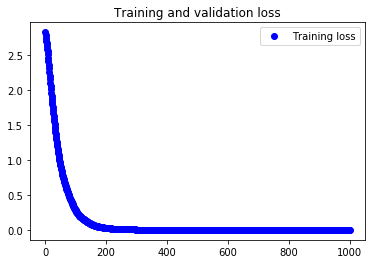

In [40]:
model.save('model_ChatBot.h5')
history_dict = history.history
history_dict.keys()
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [42]:
# create a data structure to hold user context
context = {}

ERROR_THRESHOLD = 0.65
def classify(sentence):
    # generate probabilities from the model
    p = bow(sentence, words)
    
    d = len(p)
    f = len(documents)-2
    a = np.zeros([f, d])
    tot = np.vstack((p,a))
    
    results = model.predict(tot)[0]
    
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

def response(sentence, userID, show_details=False):
    results = classify(sentence)
    
    entities = nltk.word_tokenize(sentence)
    print(ner_tagger.tag(entities))
    
    print('Result:',results)
    print('Sentence:', sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['intent'] == results[0][0]:
                    # set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details: print ('intent:', i['intent'])
                        # a random response from the intent
                        return (random.choice(i['responses']))
            results.pop(0)
    else:
        print('No result')

In [43]:
response("Saya merasa pusing dan lemas", '123', show_details=True)

[('Saya', 'O'), ('merasa', 'O'), ('pusing', 'SYMPTOMS'), ('dan', 'O'), ('lemas', 'SYMPTOMS')]
Result: [('concern', 0.99992776)]
Sentence: Saya merasa pusing dan lemas
intent: concern


'Apakah Anda merasakan sakit?'